In [1]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/netflix-shows/netflix_titles.csv


In [2]:
# Load the dataset
df = pd.read_csv('/kaggle/input/netflix-shows/netflix_titles.csv')

# Display the first few rows
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [4]:
# Check for missing values
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [5]:
# Handling missing values
df['director'].fillna('Unknown', inplace=True)
df['cast'].fillna('Unknown', inplace=True)
df['country'].fillna('Unknown', inplace=True)
df['date_added'].fillna('Unknown', inplace=True)
df['rating'].fillna('Not Rated', inplace=True)
df['duration'] = df['duration'].fillna('0 Unknown')  

# After filling missing values, check again
print(df.isnull().sum())


show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


/tmp/ipykernel_97/3181645771.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['director'].fillna('Unknown', inplace=True)
/tmp/ipykernel_97/3181645771.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

# **Encoding**

In [6]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['type_encoded'] = label_encoder.fit_transform(df['type'])

In [7]:
df = pd.get_dummies(df, columns=['rating'])

freq_encoding = df['country'].value_counts().to_dict()
df['country_encoded'] = df['country'].map(freq_encoding)

In [8]:
df['director_count'] = df['director'].apply(lambda x: len(str(x).split(',')))
df['cast_count'] = df['cast'].apply(lambda x: len(str(x).split(',')))

In [9]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month
df['day_added'] = df['date_added'].dt.day

In [10]:
# Extract numerical part of duration
df['duration_int'] = df['duration'].str.extract('(\d+)').fillna(0).astype(int)

# Extract type of duration (minutes, seasons)
df['duration_type'] = df['duration'].str.extract('([a-zA-Z]+)').fillna('Unknown')


# **Content Popularity Prediction**

In [11]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,listed_in,...,rating_TV-Y7-FV,rating_UR,country_encoded,director_count,cast_count,year_added,month_added,day_added,duration_int,duration_type
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,90 min,Documentaries,...,False,False,2818,1,1,2021.0,9.0,25.0,90,min
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",...,False,False,30,1,19,2021.0,9.0,24.0,2,Seasons
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,1 Season,"Crime TV Shows, International TV Shows, TV Act...",...,False,False,831,1,9,2021.0,9.0,24.0,1,Season
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,1 Season,"Docuseries, Reality TV",...,False,False,831,1,1,2021.0,9.0,24.0,1,Season
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",...,False,False,972,1,8,2021.0,9.0,24.0,2,Seasons


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   show_id           8807 non-null   object        
 1   type              8807 non-null   object        
 2   title             8807 non-null   object        
 3   director          8807 non-null   object        
 4   cast              8807 non-null   object        
 5   country           8807 non-null   object        
 6   date_added        8709 non-null   datetime64[ns]
 7   release_year      8807 non-null   int64         
 8   duration          8807 non-null   object        
 9   listed_in         8807 non-null   object        
 10  description       8807 non-null   object        
 11  type_encoded      8807 non-null   int64         
 12  rating_66 min     8807 non-null   bool          
 13  rating_74 min     8807 non-null   bool          
 14  rating_84 min     8807 n

In [13]:
# Creating a synthetic popularity metric
df['popularity'] = df['cast_count'] * 0.3 + df['director_count'] * 0.5 + df['duration_int'] * 0.2

# Ensure 'popularity' has no missing values and is numerical
df['popularity'] = df['popularity'].fillna(0).astype(float)

In [14]:
# Define the features and the target
features = df[['type_encoded', 'rating_66 min', 'rating_74 min', 'rating_84 min', 'rating_G', 'rating_NC-17',
               'rating_NR', 'rating_Not Rated', 'rating_PG', 'rating_PG-13', 'rating_R', 'rating_TV-14',
               'rating_TV-G', 'rating_TV-MA', 'rating_TV-PG', 'rating_TV-Y', 'rating_TV-Y7', 'rating_TV-Y7-FV',
               'rating_UR', 'country_encoded', 'director_count', 'cast_count', 'year_added', 'month_added',
               'day_added', 'duration_int']]

target = df['popularity']

In [15]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [18]:
X_train.isnull().sum()

type_encoded         0
rating_66 min        0
rating_74 min        0
rating_84 min        0
rating_G             0
rating_NC-17         0
rating_NR            0
rating_Not Rated     0
rating_PG            0
rating_PG-13         0
rating_R             0
rating_TV-14         0
rating_TV-G          0
rating_TV-MA         0
rating_TV-PG         0
rating_TV-Y          0
rating_TV-Y7         0
rating_TV-Y7-FV      0
rating_UR            0
country_encoded      0
director_count       0
cast_count           0
year_added          81
month_added         81
day_added           81
duration_int         0
dtype: int64

In [19]:
X_train['year_added'].fillna(X_train['year_added'].median(), inplace=True)
X_train['month_added'].fillna(X_train['month_added'].median(), inplace=True)
X_train['day_added'].fillna(X_train['day_added'].median(), inplace=True)

X_test['year_added'].fillna(X_train['year_added'].median(), inplace=True)
X_test['month_added'].fillna(X_train['month_added'].median(), inplace=True)
X_test['day_added'].fillna(X_train['day_added'].median(), inplace=True)

/tmp/ipykernel_97/32176249.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_test['year_added'].fillna(X_train['year_added'].median(), inplace=True)
/tmp/ipykernel_97/32176249.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inp

In [20]:
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Using a smaller number of estimators for faster initial comparisons
n_estimators = 50

# Initialize models with fewer estimators
models = {
    'RandomForest': RandomForestRegressor(n_estimators=n_estimators, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=n_estimators, random_state=42, verbosity=0),
    'ExtraTrees': ExtraTreesRegressor(n_estimators=n_estimators, random_state=42)
}

# Store results
results = {}

# Evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'MSE': mse, 'R2': r2}
    print(f'{name} - Mean Squared Error: {mse}, R^2 Score: {r2}')

# Determine the best model based on R^2 Score
best_model = max(results, key=lambda x: results[x]['R2'])
best_r2_score = results[best_model]['R2']

results, best_model, best_r2_score

RandomForest - Mean Squared Error: 0.2415551350737805, R^2 Score: 0.9977863086060292
XGBoost - Mean Squared Error: 0.14150497326721412, R^2 Score: 0.9987032014805646
ExtraTrees - Mean Squared Error: 0.20314944608399613, R^2 Score: 0.9981382710810569


({'RandomForest': {'MSE': 0.2415551350737805, 'R2': 0.9977863086060292},
  'XGBoost': {'MSE': 0.14150497326721412, 'R2': 0.9987032014805646},
  'ExtraTrees': {'MSE': 0.20314944608399613, 'R2': 0.9981382710810569}},
 'XGBoost',
 0.9987032014805646)

In [22]:
import optuna
from sklearn.model_selection import cross_val_score, KFold
from xgboost import XGBRegressor

# Define the objective function for Optuna
def objective(trial):
    # Define the hyperparameter search space using updated methods
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 300),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0)
    }
    
    model = XGBRegressor(**param, random_state=42)
    
    # Use cross-validation
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='r2')
    return scores.mean()

# Run Optuna
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

# Best hyperparameters
best_params = study.best_params
print("Best Hyperparameters:", best_params)

# Train the final model with the best parameters
best_model = XGBRegressor(**best_params, random_state=42)
best_model.fit(X_train, y_train)

# Evaluate on the test set
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Best Model - Mean Squared Error: {mse}, R^2 Score: {r2}')

[I 2024-09-01 12:50:50,034] A new study created in memory with name: no-name-92158083-1c6b-4316-badb-a3612cf9b66e
[I 2024-09-01 12:50:51,923] Trial 0 finished with value: 0.9986423236663443 and parameters: {'n_estimators': 51, 'max_depth': 6, 'learning_rate': 0.08646725680801003, 'subsample': 0.8055303145518421, 'colsample_bytree': 0.9328609156561818}. Best is trial 0 with value: 0.9986423236663443.
[I 2024-09-01 12:50:53,105] Trial 1 finished with value: 0.9993415648301992 and parameters: {'n_estimators': 189, 'max_depth': 4, 'learning_rate': 0.09722750435791197, 'subsample': 0.951359564130409, 'colsample_bytree': 0.6048420960980323}. Best is trial 1 with value: 0.9993415648301992.
[I 2024-09-01 12:50:56,255] Trial 2 finished with value: 0.993852232628571 and parameters: {'n_estimators': 238, 'max_depth': 9, 'learning_rate': 0.01450226321091982, 'subsample': 0.8688568638609957, 'colsample_bytree': 0.716399394959949}. Best is trial 1 with value: 0.9993415648301992.
[I 2024-09-01 12:50:

Best Hyperparameters: {'n_estimators': 225, 'max_depth': 5, 'learning_rate': 0.2006804181499316, 'subsample': 0.7411128828827405, 'colsample_bytree': 0.9797685647820856}
Best Model - Mean Squared Error: 0.08926096384889452, R^2 Score: 0.9991819829148758


# **Geographical Analysis of Content Availability**

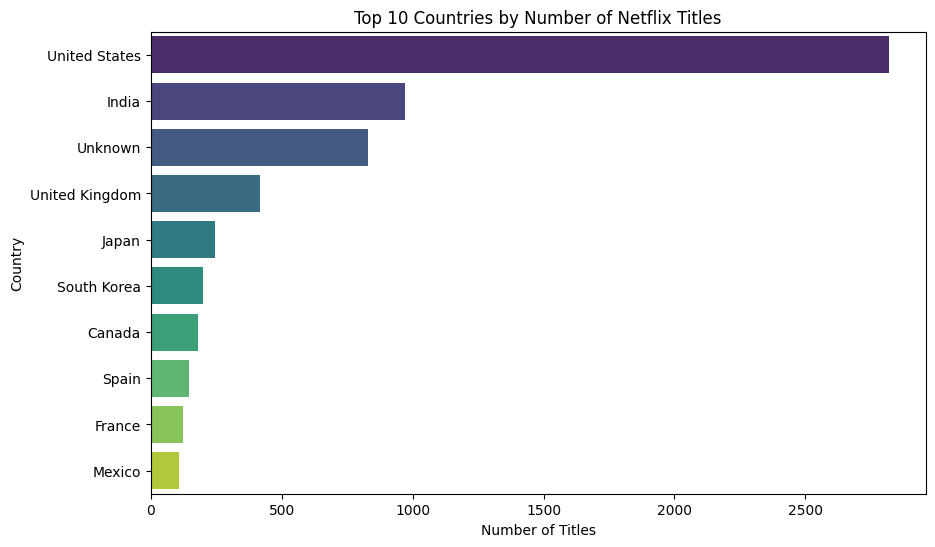

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of titles per country
country_content = df['country'].value_counts().reset_index()
country_content.columns = ['country', 'title_count']
top_countries = country_content.head(10)

# Plot the top 10 countries by content count
plt.figure(figsize=(10, 6))
sns.barplot(x='title_count', y='country', data=top_countries, palette='viridis')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.title('Top 10 Countries by Number of Netflix Titles')
plt.show()

# **Time Series Forecasting**

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


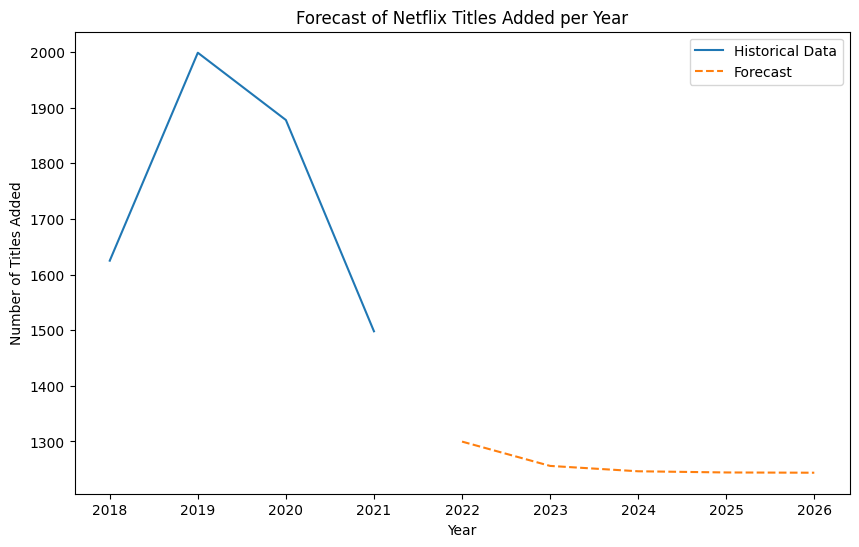

In [33]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import pandas as pd

# Convert 'date_added' to datetime and extract the year
df['year_added'] = pd.to_datetime(df['date_added'], errors='coerce').dt.year

# Filter out unrealistic years (e.g., any year before 2018 or after the current year)
current_year = pd.Timestamp.now().year
df = df[(df['year_added'] >= 2018) & (df['year_added'] <= current_year)]

# Prepare time series data: count the number of titles added per year
yearly_content = df.groupby('year_added').size()

# Ensure continuity by filling missing years with 0
# Explicitly convert the index to integers
min_year = int(yearly_content.index.min())
max_year = int(yearly_content.index.max())

yearly_content = yearly_content.reindex(range(min_year, max_year + 1), fill_value=0)

# Fit the ARIMA model
model = ARIMA(yearly_content, order=(1, 1, 1))
fit = model.fit()

# Forecast the next 5 years
forecast = fit.forecast(steps=5)
forecast_years = range(max_year + 1, max_year + 6)

# Plot the historical data and forecast
plt.figure(figsize=(10, 6))
plt.plot(yearly_content.index, yearly_content, label='Historical Data')
plt.plot(forecast_years, forecast, label='Forecast', linestyle='--')
plt.xlabel('Year')
plt.ylabel('Number of Titles Added')
plt.title('Forecast of Netflix Titles Added per Year')
plt.legend()
plt.show()


# **Content Growth Pattern Analysis**

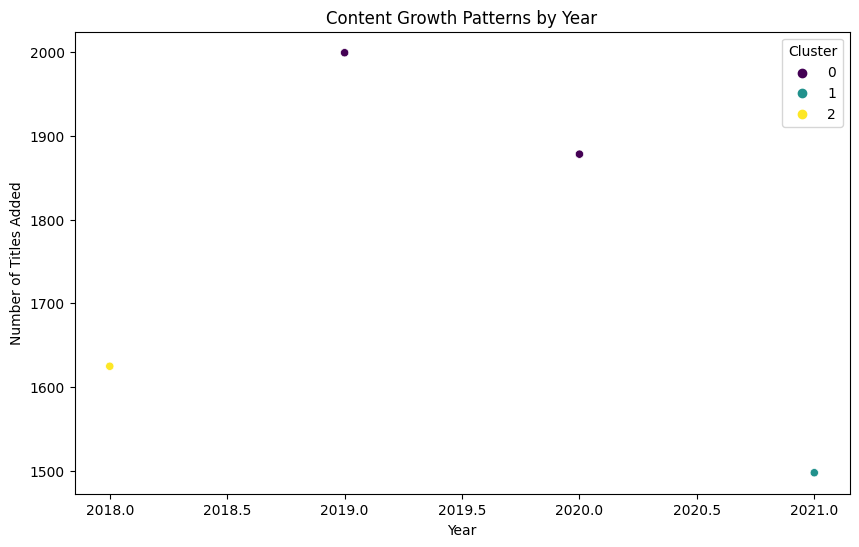

In [32]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare the yearly content data
df['year_added'] = pd.to_datetime(df['date_added'], errors='coerce').dt.year
df = df[(df['year_added'] >= 2018) & (df['year_added'] <= 2024)]
yearly_content = df.groupby('year_added').size()

# Fill missing years with 0 to maintain continuity
min_year = int(yearly_content.index.min())
max_year = int(yearly_content.index.max())
yearly_content = yearly_content.reindex(range(min_year, max_year + 1), fill_value=0)

# Ensure yearly_content is a DataFrame with consistent index
yearly_content_df = pd.DataFrame(yearly_content, columns=['title_count'])
yearly_content_df['year'] = yearly_content_df.index

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, n_init='auto', random_state=42)  # Set n_init to 'auto' to avoid the FutureWarning
yearly_content_df['cluster'] = kmeans.fit_predict(yearly_content_df[['title_count']])

# Plot the results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='year', y='title_count', hue='cluster', data=yearly_content_df, palette='viridis')
plt.xlabel('Year')
plt.ylabel('Number of Titles Added')
plt.title('Content Growth Patterns by Year')
plt.legend(title='Cluster')
plt.show()